In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE

import datetime
from datetime import datetime

Setelah preparation data<br>
dengan menggabungkan kolom tanggal Jam_masuk and Jam_pulang di excel<br>
Didapatkan gambaran data sebagai berikut


In [2]:
data = pd.read_excel('DataAfterPreparation.xlsx')
data.head()

,Nama,Tanggal,Hari,Jam_masuk,Jam_pulang,Kelalaian_masuk,Kelalaian_pulang,Keterangan,DateJammasuk,DateJamkeluar
0,Didik sutrisno,2022-08-01,Senin,07:18:00,16:02:00,0,0,Hadir,2022-08-01 07:18:00,2022-08-01 16:02:00
1,Didik sutrisno,2022-08-02,Selasa,07:24:00,16:00:00,0,0,Hadir,2022-08-02 07:24:00,2022-08-02 16:00:00
2,Didik sutrisno,2022-08-03,Rabu,07:29:00,16:00:00,0,0,Hadir,2022-08-03 07:29:00,2022-08-03 16:00:00
3,Didik sutrisno,2022-08-04,Kamis,07:28:00,16:02:00,0,0,Hadir,2022-08-04 07:28:00,2022-08-04 16:02:00
4,Didik sutrisno,2022-08-05,Jumat,07:35:00,11:04:00,5,0,Hadir,2022-08-05 07:35:00,2022-08-05 11:04:00


In [4]:
data = data[['ID', 'DateJammasuk', 'DateJamkeluar', 'Keterangan']]
data.head()

,ID,DateJammasuk,DateJamkeluar,Keterangan
0,2,2022-08-01 07:18:00,2022-08-01 16:02:00,Hadir
1,2,2022-08-02 07:24:00,2022-08-02 16:00:00,Hadir
2,2,2022-08-03 07:29:00,2022-08-03 16:00:00,Hadir
3,2,2022-08-04 07:28:00,2022-08-04 16:02:00,Hadir
4,2,2022-08-05 07:35:00,2022-08-05 11:04:00,Hadir


In [5]:
data.tail()

,ID,DateJammasuk,DateJamkeluar,Keterangan
1803,1,2023-02-22 07:59:00,2023-02-22 17:10:00,Hadir
1804,1,2023-02-23 00:00:00,2023-02-23 00:00:00,Hadir
1805,1,2023-02-24 00:00:00,2023-02-24 00:00:00,Hadir
1806,1,2023-02-27 07:51:00,2023-02-27 17:22:00,Hadir
1807,1,2023-02-28 07:55:00,2023-02-28 16:01:00,Hadir


Transformasi kolom keterangan ke bilangan numerik menggunakan Label Encoder library<br>
Hadir = 0<br>
Tidak Hadir = 1

In [6]:
# Label Encoder
LE = LabelEncoder()
output = data['Keterangan']
data['Keterangan'] = LE.fit_transform(output)
print(LE.classes_)
print(np.sort(data['Keterangan'].unique()))

['Hadir' 'Tidak Hadir']
[0 1]


<ipython-input-6-47cd476e6880>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Keterangan'] = LE.fit_transform(output)


In [7]:
data.shape

(1808, 4)

<h1>Membagi kolom X dan Y

In [8]:
x = data[['DateJammasuk', 'DateJamkeluar']]
y = data['Keterangan']

In [9]:
x.head()

,DateJammasuk,DateJamkeluar
0,2022-08-01 07:18:00,2022-08-01 16:02:00
1,2022-08-02 07:24:00,2022-08-02 16:00:00
2,2022-08-03 07:29:00,2022-08-03 16:00:00
3,2022-08-04 07:28:00,2022-08-04 16:02:00
4,2022-08-05 07:35:00,2022-08-05 11:04:00


In [10]:
y.value_counts()

0    1705
1     103
Name: Keterangan, dtype: int64

Normalisasi data menggunakan MinMax Scaler

In [11]:
print(x.head())

         DateJammasuk       DateJamkeluar
0 2022-08-01 07:18:00 2022-08-01 16:02:00
1 2022-08-02 07:24:00 2022-08-02 16:00:00
2 2022-08-03 07:29:00 2022-08-03 16:00:00
3 2022-08-04 07:28:00 2022-08-04 16:02:00
4 2022-08-05 07:35:00 2022-08-05 11:04:00


In [12]:
# Normalize MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaler = scaler.fit(x)

X = scaler.transform(x)
for i in range(5):
 print(X[i])

[6.91021330e-05 3.29093513e-06]
[0.00482728 0.00473566]
[0.00958216 0.0094746 ]
[0.0143173  0.01422013]
[0.01907877 0.01797838]


Melihat kehadiran pegawai menggunakan bar plot

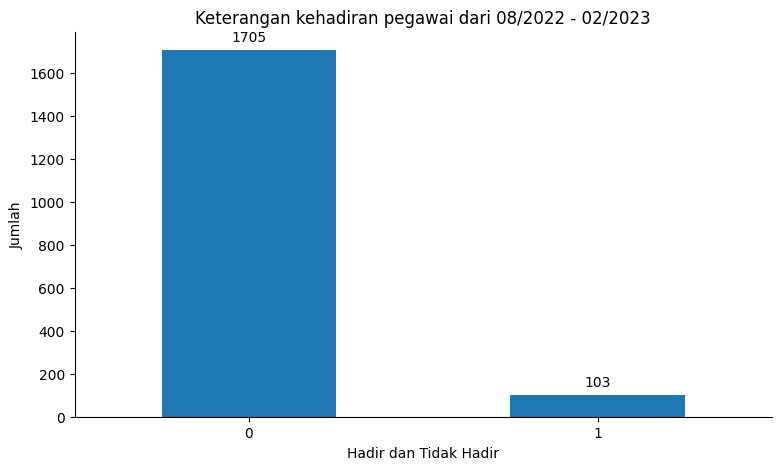

In [18]:
plt.figure(figsize=(9,5))
splot = y.value_counts().plot.bar()
sns.despine(top=True, right=True)
plt.title('Keterangan kehadiran pegawai dari 08/2022 - 02/2023')
plt.ylabel('Jumlah')
plt.xlabel('Hadir dan Tidak Hadir')
plt.xticks(rotation=0)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')

Dari bulan ke 8 2022 hingga bulan ke 2 2023.<br>
Keterangan Hadir lebih banyak, yaitu sebesar 1705 Sedangkan yang Tidak Hadir lebih sedikit, yaitu sebesar 103.<br>
Dimana membuat data tersebut imbalanced, yang mana data imbalanced salah satu yang membuat suatu model mempunyai performa yang buruk.<br>
maka dari itu dilakukan oversampling menggunakan metode SMOTE untuk menghindari adanya data yang imbalanced.<br>


In [19]:
# Oversampling using SMOTE method
sm = SMOTE(random_state=30)
x_sampling, y_sampling = sm.fit_resample(X,y)

Visualisasi data setelah dilakukan oversampling menggunakan metode SMOTE

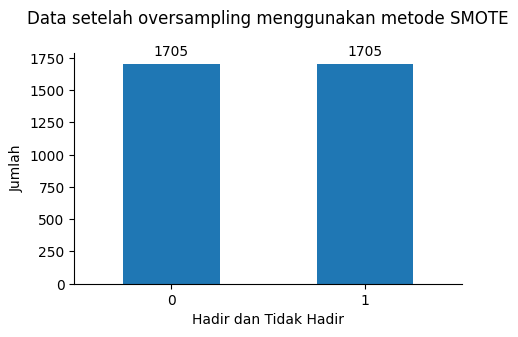

In [20]:
plt.figure(figsize=(5,3))
splot = y_sampling.value_counts().plot.bar()
sns.despine(top=True, right=True)
plt.title('Data setelah oversampling menggunakan metode SMOTE\n')
plt.ylabel('Jumlah')
plt.xlabel('Hadir dan Tidak Hadir')
plt.xticks(rotation=0)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')

Melakukan split data menggunakan train test split<br>
Training data = 70%<br>
Test data = 30%<br>

In [21]:
# Train test Split
X_train, X_test, y_train, y_test = train_test_split(x_sampling, y_sampling, test_size=0.3, random_state=42)

Melihat data train dan test pada data yang sudah terbagi

In [23]:
new_df_train = pd.DataFrame({'X_train':X_train[:,0], 'y_train':y_train})
new_df_test = pd.DataFrame({'X_test':X_test[:,1], 'y_test':y_test})
print(new_df_train.head())
print(new_df_test.head())

       X_train  y_train
3329  0.632148        1
1674  0.909967        0
1213  0.606552        0
2874  0.145179        1
994   0.544989        0
        X_test  y_test
3135  0.976377       1
1789  0.876705       0
170   0.109012       0
680   0.312774       0
2803  0.507854       1


In [24]:
# max_y_xtrain = X_train.max()
# min_y_xtrain = X_train.min()
# max_y_xtest = X_test.max()
# min_y_xtest = X_test.min()

Visualisasi terhadap data training dan test

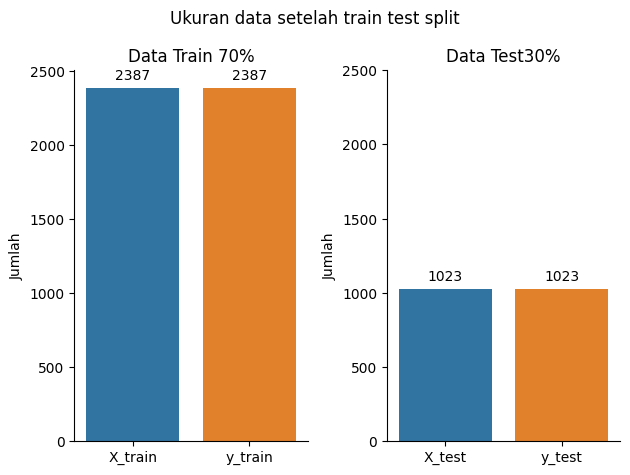

In [25]:
fig, ax = plt.subplots(1,2)

splot = sns.countplot(new_df_train, ax=ax[0])
sns.despine(top=True, right=True)
fig.suptitle('Ukuran data setelah train test split')
ax[0].tick_params(labelrotation=0)
ax[0].set_title('Data Train 70%')
ax[0].set_ylabel('Jumlah')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')

splot1 = sns.countplot(new_df_test, ax=ax[1])
ax[1].tick_params(labelrotation=0)
ax[1].set_title('Data Test30%')
ax[1].set_ylabel('Jumlah')
for p in splot1.patches:
    splot1.annotate(format(p.get_height(), '.0f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')
plt.ylim(0, 2500)
plt.tight_layout()
plt.show()

Melakukan visualisasi terhadap variable y

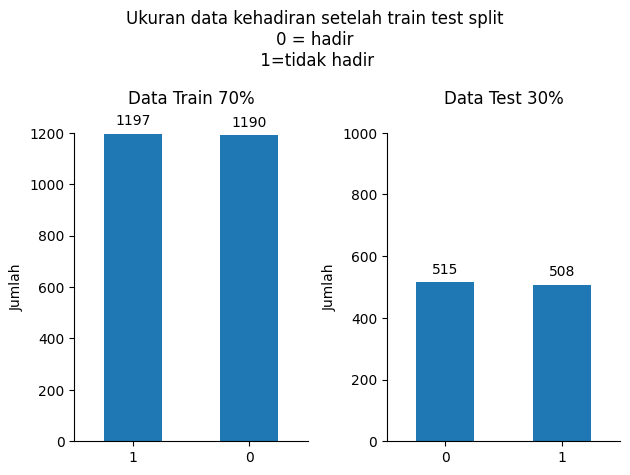

In [26]:
fig, ax = plt.subplots(1,2)

splot = new_df_train['y_train'].value_counts().plot.bar(ax=ax[0], ylim=(0,1200))
sns.despine(top=True, right=True)
fig.suptitle('Ukuran data kehadiran setelah train test split\n0 = hadir\n 1=tidak hadir')
ax[0].tick_params(labelrotation=0)
ax[0].set_title('Data Train 70%\n')
ax[0].set_ylabel('Jumlah')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')

splot1 = new_df_test['y_test'].value_counts().plot.bar(ax=ax[1], ylim=(0,1000))
ax[1].tick_params(labelrotation=0)
ax[1].set_title('Data Test 30%\n')
ax[1].set_ylabel('Jumlah')
for p in splot1.patches:
    splot1.annotate(format(p.get_height(), '.0f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')
# plt.ylim(0, 1200)
plt.tight_layout()
plt.show()

<h1>Pelatihan Model SVM pertama

In [27]:
clf = SVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
clf.score(X_test, y_test)

0.5904203323558163

<h1>Hasil Confusion Matrix pertama

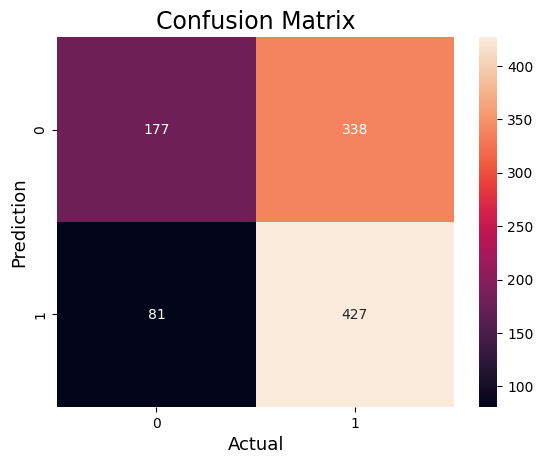

Accuracy   : 0.5904203323558163
Precision : 0.5581699346405229
Recall    : 0.8405511811023622
F1-score  : 0.6708562450903377


In [28]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,
            annot=True,
            fmt='g')
            # xticklabels=['malignant', 'benign'],
            # yticklabels=['malignant', 'benign'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()


# Finding precision and recall
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy   :", accuracy)
precision = precision_score(y_test, y_pred)
print("Precision :", precision)
recall = recall_score(y_test, y_pred)
print("Recall    :", recall)
F1_score = f1_score(y_test, y_pred)
print("F1-score  :", F1_score)

<h1>Evaluasi Model

Hyperparameter Tunning menggunakan GridSearchCV

In [32]:
from sklearn.model_selection import GridSearchCV


param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf', 'poly', 'sigmoid']}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)


grid.fit(X_train, y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.510 total time=   0.2s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.521 total time=   0.2s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.589 total time=   0.2s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.570 total time=   0.2s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.530 total time=   0.2s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.492 total time=   0.1s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.498 total time=   0.1s
[CV 3/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.551 total time=   0.1s
[CV 4/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.526 total time=   0.2s
[CV 5/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.495 total time=   0.1s
[CV 1/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.498 total time=   0.3s
[CV 2/5] END ....C=0.1, gamma=1, kernel=sigmoid

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             verbose=3)

Melihat hasil terbaik yang dihasilkan oleh hyperparameter tunning grid search cv

In [33]:
# print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 1000, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=1000, gamma=1)


Training model setelah Hyperparameter Tunning

In [34]:
clf = SVC(kernel='rbf', gamma=1, C=1000)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
clf.score(X_test, y_test)

0.8963831867057673

Visualisasi confusion matrix

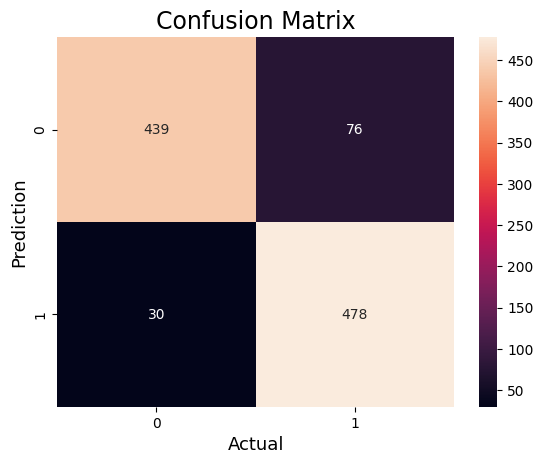

Accuracy   : 0.8963831867057673
Precision : 0.8628158844765343
Recall    : 0.9409448818897638
F1-score  : 0.9001883239171375


In [35]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,
            annot=True,
            fmt='g')
            # xticklabels=['malignant', 'benign'],
            # yticklabels=['malignant', 'benign'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()


# Finding precision and recall
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy   :", accuracy)
precision = precision_score(y_test, y_pred)
print("Precision :", precision)
recall = recall_score(y_test, y_pred)
print("Recall    :", recall)
F1_score = f1_score(y_test, y_pred)
print("F1-score  :", F1_score)

<H1>SELESAI

Contoh jika hasil model klasifikasi yang sudah dibuat di implementasikan langsung ke dalam sebuah full data

*variable*<BR>
X[i,0] atau X[:, 0] = x1 <br>
X[i,1] atau X[:, 1] = x2 <br>

In [37]:
# mencari data sampel
for index, i in enumerate(range(1, 20)):
  # print(index, clf.predict([[X[i, 0], X[i, 1]]]))
  hasil_prediksi = clf.predict([[X[i, 0], X[i, 1]]])
  # print([X[i, 0], X[i, 1]])

In [38]:
data['Hasil_prediksi'] = clf.predict(X)
data.head()

,ID,DateJammasuk,DateJamkeluar,Keterangan,Hasil_prediksi
0,2,2022-08-01 07:18:00,2022-08-01 16:02:00,0,0
1,2,2022-08-02 07:24:00,2022-08-02 16:00:00,0,0
2,2,2022-08-03 07:29:00,2022-08-03 16:00:00,0,0
3,2,2022-08-04 07:28:00,2022-08-04 16:02:00,0,0
4,2,2022-08-05 07:35:00,2022-08-05 11:04:00,0,0


In [39]:
data.loc[(data['Keterangan'] != data['Hasil_prediksi'])]

,ID,DateJammasuk,DateJamkeluar,Keterangan,Hasil_prediksi
9,2,2022-08-12 07:23:00,2022-08-12 11:02:00,0,1
13,2,2022-08-19 07:20:00,2022-08-19 11:02:00,0,1
18,2,2022-08-26 07:29:00,2022-08-26 11:00:00,0,1
31,11,2022-08-12 07:20:00,2022-08-12 11:05:00,0,1
40,11,2022-08-26 07:17:00,2022-08-26 11:05:00,0,1
...,...,...,...,...,...
1798,1,2023-02-15 00:00:00,2023-02-15 00:00:00,0,1
1799,1,2023-02-16 00:00:00,2023-02-16 00:00:00,0,1
1800,1,2023-02-17 00:00:00,2023-02-17 00:00:00,0,1
1804,1,2023-02-23 00:00:00,2023-02-23 00:00:00,0,1


prediksi data

In [40]:
# mencari data sampel
for index, i in enumerate(range(X.shape[0])):
  print(index, clf.predict([[X[i, 0], X[i, 1]]]))

0 [0]
1 [0]
2 [0]
3 [0]
4 [0]
5 [0]
6 [0]
7 [0]
8 [0]
9 [1]
10 [0]
11 [0]
12 [0]
13 [1]
14 [0]
15 [0]
16 [0]
17 [0]
18 [1]
19 [0]
20 [0]
21 [0]
22 [0]
23 [0]
24 [0]
25 [0]
26 [0]
27 [0]
28 [0]
29 [0]
30 [0]
31 [1]
32 [0]
33 [0]
34 [0]
35 [0]
36 [0]
37 [0]
38 [0]
39 [0]
40 [1]
41 [0]
42 [0]
43 [0]
44 [0]
45 [0]
46 [0]
47 [0]
48 [0]
49 [0]
50 [0]
51 [0]
52 [0]
53 [1]
54 [0]
55 [0]
56 [0]
57 [0]
58 [0]
59 [0]
60 [0]
61 [0]
62 [1]
63 [0]
64 [0]
65 [0]
66 [0]
67 [0]
68 [0]
69 [0]
70 [0]
71 [0]
72 [0]
73 [0]
74 [0]
75 [1]
76 [0]
77 [0]
78 [0]
79 [1]
80 [0]
81 [0]
82 [0]
83 [0]
84 [1]
85 [0]
86 [0]
87 [0]
88 [0]
89 [0]
90 [0]
91 [0]
92 [0]
93 [0]
94 [0]
95 [0]
96 [0]
97 [1]
98 [0]
99 [0]
100 [0]
101 [1]
102 [0]
103 [0]
104 [0]
105 [0]
106 [1]
107 [0]
108 [0]
109 [0]
110 [0]
111 [0]
112 [0]
113 [0]
114 [0]
115 [0]
116 [0]
117 [0]
118 [0]
119 [1]
120 [0]
121 [0]
122 [0]
123 [1]
124 [0]
125 [0]
126 [0]
127 [0]
128 [1]
129 [0]
130 [0]
131 [0]
132 [0]
133 [0]
134 [0]
135 [0]
136 [0]
137 [0]
138 [0